# Assignment 2: Detecting Financial Fraud using Machine Learning

---

## Submission Details

* **Name:** Mahmud Hasan Khan
* **Roll:** 2025-1-83-005
* **Session:** Fall-2025
* **Subject:** Data Analytics for Finance
* **Python Version:** 3.13.5
* **Jupyter Version:** 2.0.2

---

### Course Instructor
Md. Nayem Dewan

### Date of Submission
04 December 2025

---


In [72]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, average_precision_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve


In [73]:
df_original = pd.read_csv("Mahmud Hasan - creditcard.csv")

In [74]:
df_original.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [75]:
duplicate_count = df_original.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 1081


In [76]:
df_original[df_original.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0000,-0.5299,0.8739,1.3472,0.1455,0.4142,0.1002,0.7112,0.1761,-0.2867,...,0.0469,0.2081,-0.1855,0.0010,0.0988,-0.5529,-0.0733,0.0233,6.1400,0
35,26.0000,-0.5354,0.8653,1.3511,0.1476,0.4337,0.0870,0.6930,0.1797,-0.2856,...,0.0495,0.2065,-0.1871,0.0008,0.0981,-0.5535,-0.0783,0.0254,1.7700,0
113,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,...,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
114,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,...,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
115,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,...,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0000,1.9125,-0.4552,-1.7507,0.4543,2.0891,4.1600,-0.8813,1.0817,1.0229,...,-0.5241,-1.3375,0.4739,0.6167,-0.2835,-1.0848,0.0731,-0.0360,11.9900,0
283483,171627.0000,-1.4644,1.3681,0.8160,-0.6013,-0.6891,-0.4872,-0.3038,0.8850,0.0541,...,0.2872,0.9478,-0.2188,0.0829,0.0441,0.6393,0.2136,0.1193,6.8200,0
283485,171627.0000,-1.4580,1.3782,0.8115,-0.6038,-0.7119,-0.4717,-0.2825,0.8807,0.0528,...,0.2842,0.9497,-0.2169,0.0833,0.0449,0.6399,0.2194,0.1168,11.9300,0
284191,172233.0000,-2.6679,3.1605,-3.3560,1.0078,-0.3774,-0.1097,-0.6672,2.3097,-1.6393,...,0.3915,0.2665,-0.0799,-0.0964,0.0867,-0.4511,-1.1837,-0.2222,55.6600,0


In [77]:
if duplicate_count > 0:
    df_original.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates to remove.")
    
print(f"New Dataframe shape: {df_original.shape}")

Duplicates removed.
New Dataframe shape: (283726, 31)


## Part 1: Exploratory Data Analysis (EDA) & Preprocessing

### Visual Inspection: Visualize the class imbalance.

Class
0    283253
1       473
Name: count, dtype: int64


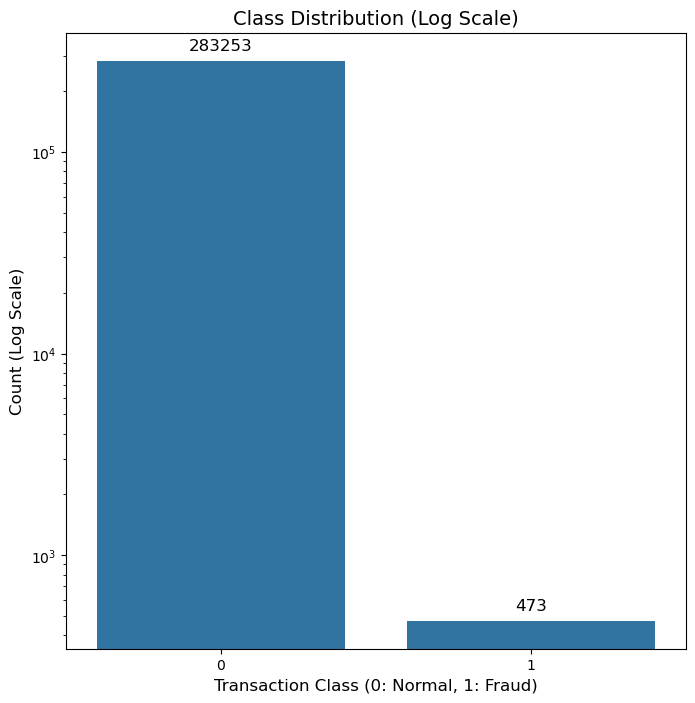

Percentage of Fraudulent Transactions: 0.1667%


In [78]:
# Check class distribution
count_classes = df_original['Class'].value_counts(sort=True)
print(count_classes)

# Visualize Class Imbalance
plt.figure(figsize=(8, 8))

ax = sns.countplot(x='Class', data=df_original)
plt.yscale('log')

plt.title('Class Distribution (Log Scale)', fontsize=14)
plt.xlabel('Transaction Class (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Count (Log Scale)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Calculate percentage
fraud_share = df_original['Class'].value_counts()[1] / len(df_original)
print(f"Percentage of Fraudulent Transactions: {fraud_share:.4%}")

### Feature Analysis: Analyse the Amount and Time distributions for Fraud vs. Normal transactions. 

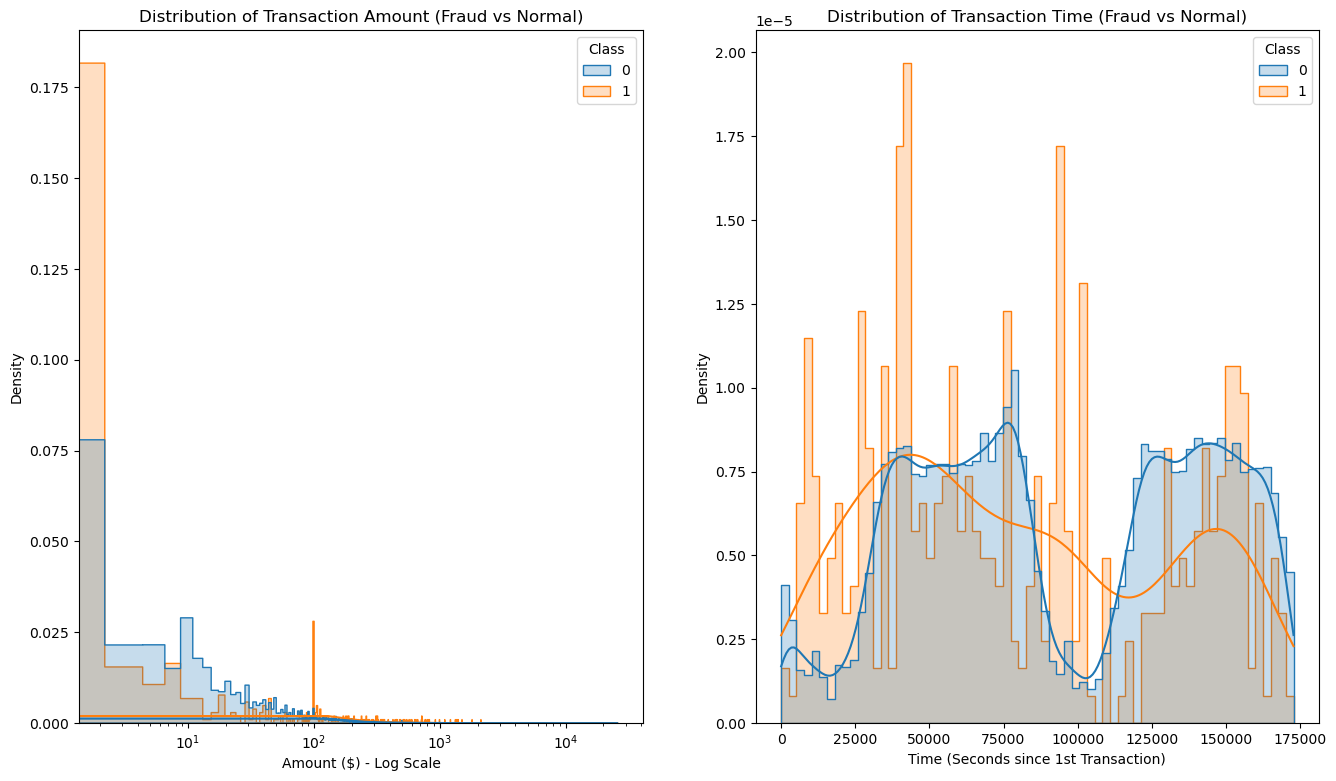

--- Transaction Amount Statistics ---
            count     mean      std    min    25%     50%      75%        max
Class                                                                        
0     283253.0000  88.4136 250.3790 0.0000 5.6700 22.0000  77.4600 25691.1600
1        473.0000 123.8719 260.2110 0.0000 1.0000  9.8200 105.8900  2125.8700


In [79]:
# Compare Amount and Time distributions
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

# --- Plot 1: Distribution of Transaction Amount ---
# We use a log scale on the x-axis because 'Amount' varies wildly (from $0 to thousands)
sns.histplot(data=df_original, x='Amount', hue='Class', kde=True, element="step", stat="density", common_norm=False, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount (Fraud vs Normal)')
ax[0].set_xscale('log') # Log scale helps visualize the wide range of amounts
ax[0].set_xlabel('Amount ($) - Log Scale')

# --- Plot 2: Distribution of Transaction Time ---
sns.histplot(data=df_original, x='Time', hue='Class', kde=True, element="step", stat="density", common_norm=False, ax=ax[1])
ax[1].set_title('Distribution of Transaction Time (Fraud vs Normal)')
ax[1].set_xlabel('Time (Seconds since 1st Transaction)')

plt.show()

# --- Statistical Check ---
print("--- Transaction Amount Statistics ---")
print(df_original.groupby('Class')['Amount'].describe())

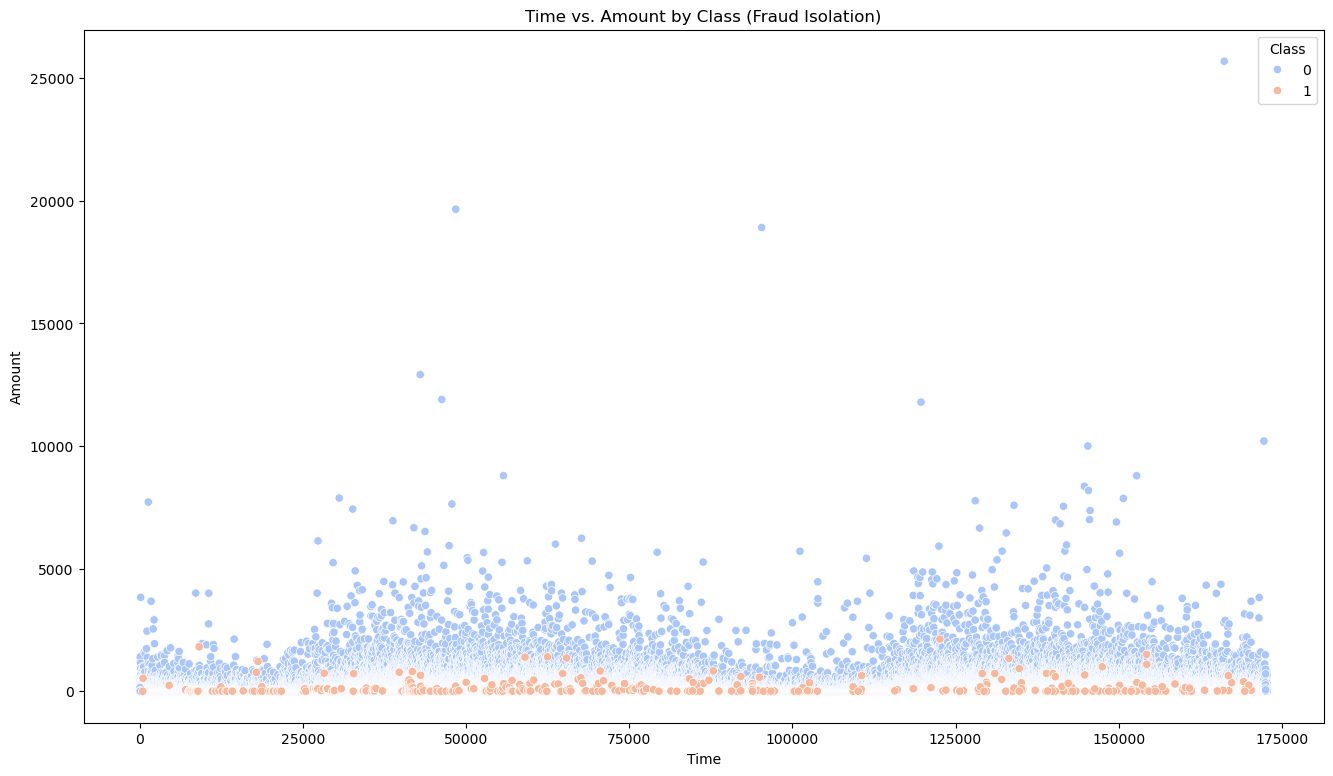

In [80]:
# Sort by 'Class' to put fraudulent transactions on top for visibility
df_sorted = df_original.sort_values(by='Class')

# Create the scatter plot
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df_sorted, alpha=1, palette='coolwarm')
plt.title('Time vs. Amount by Class (Fraud Isolation)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [81]:
print(df_original['Time'].describe())

count   283726.0000
mean     94811.0776
std      47481.0479
min          0.0000
25%      54204.7500
50%      84692.5000
75%     139298.0000
max     172792.0000
Name: Time, dtype: float64


#### Do fraudulent transactions tend to be larger or smaller?
Answer: From the distribution of transaction amounts, it can be seen that fraudulent transactions at low amount are with high density and fraudulent transactions at high amount are with low density. This shows that fraudulent transactions are more likely to be smaller. Whereas normal transactions at low amount are with low density and normal transactions at high amount are with high density. This shows that normal transactions are more likely to be larger. In short, fraudulent amount is predominantly low-value.

In case of distribution of transaction time, it can be seen that regular transactions are occuring at a definite interval and has a pattern. The pattern likely is that the valleys are occuring at a definite interval and the peaks are occuring at a definite interval. From time data it can be inferred that the valleys are nighttime or when cardholders are inactive and the peaks are occuring during the day or when cardholders are active. The fraud distribution does not follow this cyclical pattern.

### Correlation: Check if specific PCA features correlate strongly with the target variable (Class).

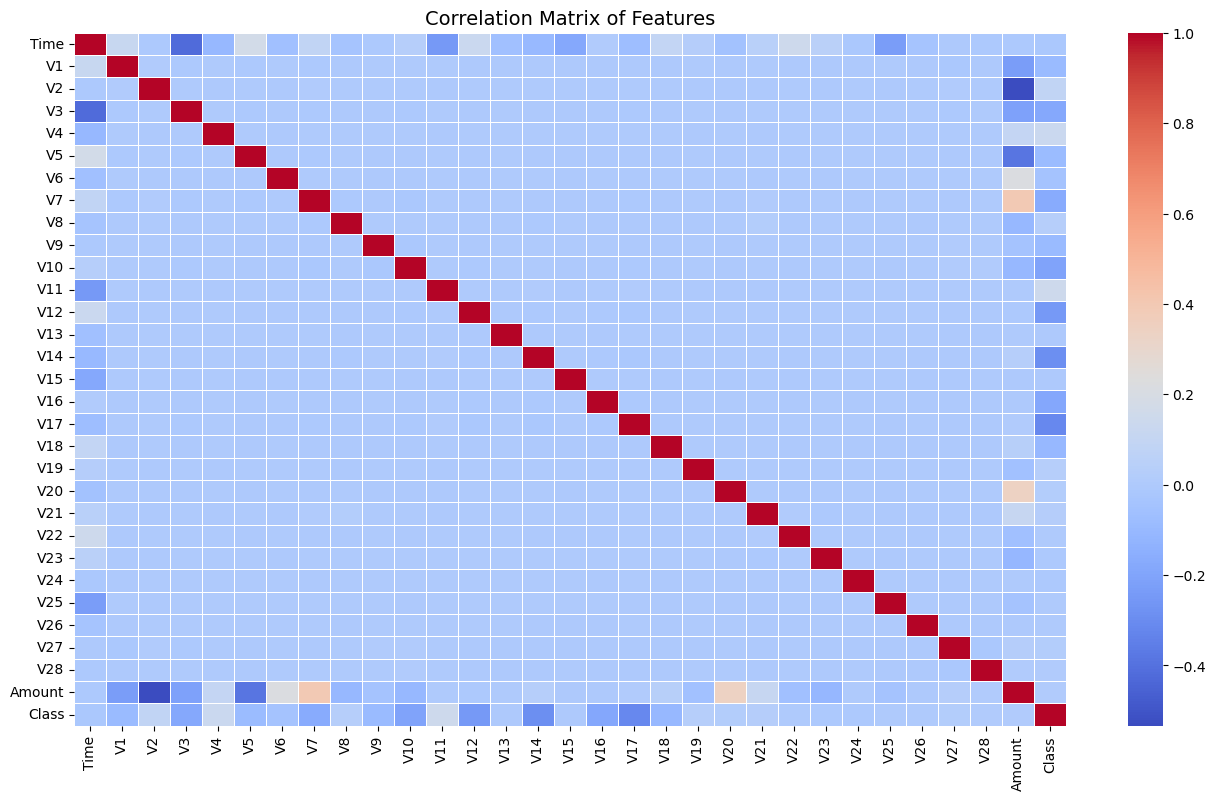

Top correlations with Class:
Class   1.0000
V11     0.1491
V4      0.1293
V2      0.0846
V19     0.0336
Name: Class, dtype: float64
V16   -0.1872
V10   -0.2070
V12   -0.2507
V14   -0.2934
V17   -0.3135
Name: Class, dtype: float64


In [82]:
# Correlation matrix
corr = df_original.corr()

plt.figure(figsize=(16, 9))
sns.heatmap(corr, cmap='coolwarm', annot_kws={'size':20}, linecolor='white', linewidths=0.5)
plt.title("Correlation Matrix of Features", fontsize=14)
plt.show()

# Identify features most correlated with Class
print("Top correlations with Class:")
print(corr['Class'].sort_values(ascending=False).head(5))
print(corr['Class'].sort_values(ascending=False).tail(5))

Explanation: The correlation matrix reveals that V17, V14, V12, and V10 show a strong negative correlation with the Class variable, while V11 and V4 show a clear positive correlation. Features like V13, V15, V22, V24, V25, and V26 are almost white/pale blue in the Class row. This suggests they have no linear relationship with fraud.

### Scaling: The PCA features (V1-V28) are already scaled, but Amount and Time are not. Robust Scaler has been applied  to both time and amount columns. Before scaling is applied to time it is converted to 24 hours format.

In [83]:
df_original.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [84]:
df = df_original.copy()
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600)) % 24

rob_scaler = RobustScaler()
std_scaler = StandardScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df[['Hour']])



df.drop(['Time', 'Amount', 'Hour'], axis=1, inplace=True)


print("Data scaled. First 5 rows:")
print(df.head())

Data scaled. First 5 rows:
       V1      V2     V3      V4      V5      V6      V7      V8      V9  \
0 -1.3598 -0.0728 2.5363  1.3782 -0.3383  0.4624  0.2396  0.0987  0.3638   
1  1.1919  0.2662 0.1665  0.4482  0.0600 -0.0824 -0.0788  0.0851 -0.2554   
2 -1.3584 -1.3402 1.7732  0.3798 -0.5032  1.8005  0.7915  0.2477 -1.5147   
3 -0.9663 -0.1852 1.7930 -0.8633 -0.0103  1.2472  0.2376  0.3774 -1.3870   
4 -1.1582  0.8777 1.5487  0.4030 -0.4072  0.0959  0.5929 -0.2705  0.8177   

      V10  ...     V22     V23     V24     V25     V26     V27     V28  Class  \
0  0.0908  ...  0.2778 -0.1105  0.0669  0.1285 -0.1891  0.1336 -0.0211      0   
1 -0.1670  ... -0.6387  0.1013 -0.3398  0.1672  0.1259 -0.0090  0.0147      0   
2  0.2076  ...  0.7717  0.9094 -0.6893 -0.3276 -0.1391 -0.0554 -0.0598      0   
3 -0.0550  ...  0.0053 -0.1903 -1.1756  0.6474 -0.2219  0.0627  0.0615      0   
4  0.7531  ...  0.7983 -0.1375  0.1413 -0.2060  0.5023  0.2194  0.2152      0   

   scaled_amount  scaled_time

Logic: Scaling Amount is done with RobustScaler as it is highly prone to outliers. Time is mapped using 24 hour format. and then this is scaled with standard scaler. Cyclic scaler result in worse performance than standard scaler. As our end goal is to predict the maximum fraudulant activities, though not logical to use standard scaler but it is used for for maximize the recall or catching maximum frauds.

## Part 2: Unsupervised Learning (Anomaly Detection)

### Drop the Label: Remove the Class column from your training set for this section.

In [85]:
# Create X (features) and y (labels)
X = df.drop('Class', axis=1)
y = df['Class']

In [86]:
# Split the data first (Stratified to keep fraud ratio same in train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f"Features shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Features shape: {X_test.shape}, Labels shape: {y_test.shape}")

Features shape: (198608, 30), Labels shape: (198608,)
Features shape: (85118, 30), Labels shape: (85118,)


### Implement an Unsupervised Model: Isolation forest is choosen for the outlier detection.
Isolation Forest is the optimal choice for this assignment because it is computationally efficient and explicitly designed for large, high-dimensional datasets like the Credit Card Fraud data (283,726 rows). Unlike distance-based algorithms (like LOF or One-Class SVM) that calculate relationships between every data point—a process that is often too slow for this volume of data—Isolation Forest detects anomalies by randomly "isolating" them. Since fraudulent transactions are rare (0.17%) and distinct ("few and different"), they are isolated much faster than normal points, making this model both swift and effective for the "odd one out" scenario.

From EDA it is found that fraud is ~0.17%, so contamination has been set around that value.

In [87]:
# Isolation Forest

contamination_rate = 0.0018 # Slightly higher than 0.17% to be safe

iso_forest = IsolationForest(n_estimators=100,
                             max_samples='auto',
                             contamination=contamination_rate,
                             random_state=42,
                             n_jobs=-1)

print(f"Training Isolation Forest with contamination={contamination_rate}...")
iso_forest.fit(X_train)

Training Isolation Forest with contamination=0.0018...


IsolationForest(contamination=0.0018, n_jobs=-1, random_state=42)

### Prediction: Use the model to predict anomalies on your test set and compare them against the actual labels you set aside.

In [88]:
# Predict anomalies
y_pred_iso = iso_forest.predict(X_test)

# Isolation Forest returns -1 for outliers (fraud) and 1 for inliers (normal)
# We need to map this to 0 (normal) and 1 (fraud) to match our original labels
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Check how many frauds the unsupervised model found
unique, counts = np.unique(y_pred_iso, return_counts=True)
print("Unsupervised Predictions Distribution:", dict(zip(unique, counts)))

# Evaluation of Unsupervised Model
cm = confusion_matrix(y_test, y_pred_iso)
print("\n--- Isolation Forest Results ---")
print(cm)
print(classification_report(y_test, y_pred_iso))

Unsupervised Predictions Distribution: {np.int64(0): np.int64(84960), np.int64(1): np.int64(158)}

--- Isolation Forest Results ---
[[84856   120]
 [  104    38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.24      0.27      0.25       142

    accuracy                           1.00     85118
   macro avg       0.62      0.63      0.63     85118
weighted avg       1.00      1.00      1.00     85118



#### Explanation: 
The Isolation Forest model struggles significantly in this scenario. In terms of catching fraud (Recall), it performed poorly, detecting only 38 cases while missing 120 (a Recall of ~27%). This means nearly 73% of fraudulent activity went unnoticed, resulting in significant financial loss for the bank. Regarding annoying legitimate customers (Precision), the model triggered 120 false alarms. For every single fraudster caught, nearly three legitimate customers had their cards declined unnecessarily. This ratio represents a poor user experience. Overall, while the model successfully identified some anomalies without any historical labels (which is impressive in itself), it is too imprecise and "leaky" to be the sole line of defense.

## Part 3: Supervised Learning (Classification)

### Handle Imbalance: Implement a technique to address the 0.17% fraud rate using SMOTE.

In [89]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique)
# This creates synthetic fraud cases in the training data only
print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before SMOTE, counts of label '1': 331
After SMOTE, counts of label '1': 198277
After SMOTE, counts of label '0': 198277


### Implement XGBoost Supervised Model
XGBoost is the ideal choice for this scenario because it utilizes gradient boosting—a technique that builds trees sequentially to correct the errors of previous ones—allowing it to capture highly complex, non-linear fraud patterns that simpler models like Logistic Regression miss. Unlike Random Forest, which treats all data points equally, XGBoost focuses specifically on the "hard-to-predict" cases (the rare fraud examples), often resulting in a superior Area Under the Precision-Recall Curve (AUPRC). Its built-in regularization also prevents overfitting, ensuring that the model performs reliably on unseen test data rather than just memorizing the training set, making it the industry standard for high-stakes tabular datasets.

In [90]:

# 1. Define the Parameter Grid
# These are the most important settings to tune for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5, 6, 8],           # Depth of each tree (prevents overfitting)
    'subsample': [0.6, 0.8, 1.0],           # % of samples used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],    # % of features used for each tree
    'gamma': [0, 0.1, 0.2]                  # Minimum loss reduction required for a split
}

# 2. Initialize the Model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    device="cuda",          # Enable GPU acceleration
    tree_method="hist",     # Required for efficient GPU training
    random_state=42
)

# 3. Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=20,
    scoring='recall',       # optimizing for Recall to catch more fraud!
    cv=3,                   # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1               # Use all CPU cores for the search wrapper
)

# 4. Fit the Model
# We use the SMOTE-resampled data (X_train_res, y_train_res) from the previous step
print("Starting Hyperparameter Tuning on GPU...")
random_search.fit(X_train_res, y_train_res)

# 5. Get Best Results
best_params = random_search.best_params_
print(f"\nBest Parameters found: {best_params}")

Starting Hyperparameter Tuning on GPU...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best Parameters found: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [91]:
best_xgb = random_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

## Part 4: Evaluation & Comparison

### Metrics: Calculate Precision, Recall, F1-Score, and AUPRC (Area Under the Precision-Recall Curve).

In [92]:
# --- 1. Gather Data for Isolation Forest ---

y_pred_iso_binary = y_pred_iso 
y_scores_iso = -iso_forest.decision_function(X_test) # The inverted scores
auprc_iso = average_precision_score(y_test, y_scores_iso)
precision_iso, recall_iso, thresholds_iso = precision_recall_curve(y_test, y_scores_iso)

# --- 2. Gather Data for XGBoost ---    
y_pred_xgb_binary = y_pred_xgb
y_probs_xgb = best_xgb.predict_proba(X_test)[:, 1]
auprc_xgb = average_precision_score(y_test, y_probs_xgb)
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_probs_xgb)

In [93]:
def get_metrics(y_true, y_pred, y_scores, model_name):
    return {
        'Model': model_name,
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUPRC': average_precision_score(y_true, y_scores)
    }

# --- Compile the Data ---
results = [
    get_metrics(y_test, y_pred_iso_binary, y_scores_iso, 'Isolation Forest (Unsupervised)'),
    get_metrics(y_test, y_pred_xgb_binary, y_probs_xgb, 'XGBoost (Supervised)')
]

# --- Create and Format the DataFrame ---
comparison_df = pd.DataFrame(results)
comparison_df.set_index('Model', inplace=True)

# Optional: Format for cleaner display (round to 4 decimal places)
pd.options.display.float_format = '{:.4f}'.format

# --- Print Detailed Metrics ---

print("\n--- Detailed Classification Report of XGBoost ---")
print(classification_report(y_test, y_pred_xgb))

print("\n--- Detailed Classification Report (Isolation Forest) ---")
print(classification_report(y_test, y_pred_iso))



# Display the comparison table
print("\n--- Final Model Comparison ---")
display(comparison_df)




--- Detailed Classification Report of XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.80      0.78      0.79       142

    accuracy                           1.00     85118
   macro avg       0.90      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118


--- Detailed Classification Report (Isolation Forest) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.24      0.27      0.25       142

    accuracy                           1.00     85118
   macro avg       0.62      0.63      0.63     85118
weighted avg       1.00      1.00      1.00     85118


--- Final Model Comparison ---


,Precision,Recall,F1-Score,AUPRC
Model,,,,
Isolation Forest (Unsupervised),0.2405,0.2676,0.2533,0.1594
XGBoost (Supervised),0.7986,0.7817,0.7900,0.8019


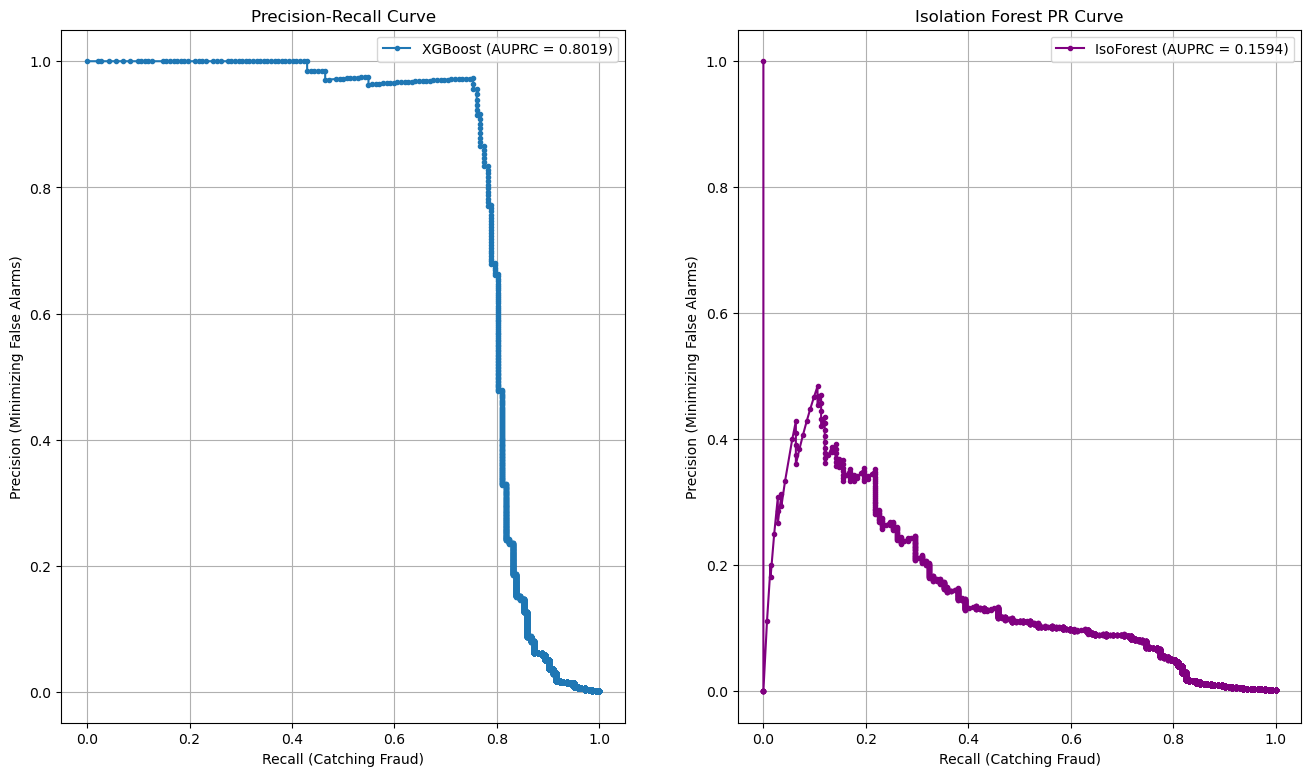

In [94]:
plt.figure(figsize=(16, 9))

# Plot PR Curve
plt.subplot(1, 2, 1)
plt.plot(recall_xgb, precision_xgb, marker='.', label=f'XGBoost (AUPRC = {auprc_xgb:.4f})')
plt.xlabel('Recall (Catching Fraud)')
plt.ylabel('Precision (Minimizing False Alarms)')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall_iso, precision_iso, marker='.', label=f'IsoForest (AUPRC = {auprc_iso:.4f})', color='purple')
plt.xlabel('Recall (Catching Fraud)')
plt.ylabel('Precision (Minimizing False Alarms)')
plt.title('Isolation Forest PR Curve')
plt.legend()
plt.grid(True)

plt.show()


### Confusion Matrix: Plot the confusion matrix for both your Supervised and Unsupervised models.

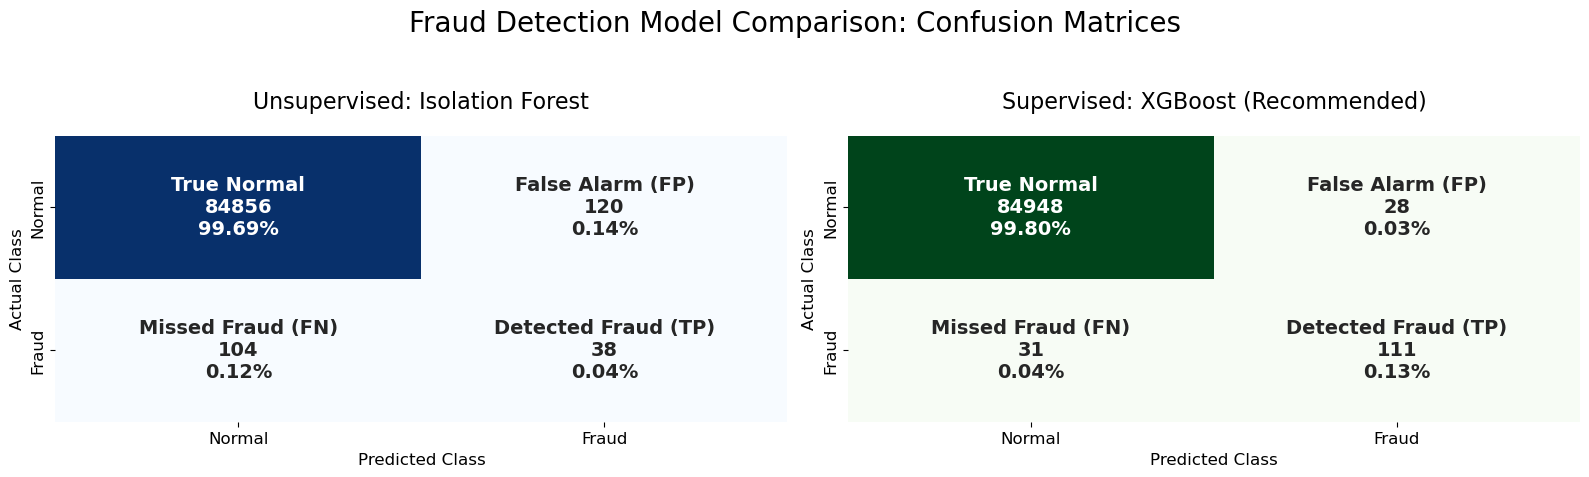

In [95]:

def make_labels(cm):
    group_names = ['True Normal', 'False Alarm (FP)', 'Missed Fraud (FN)', 'Detected Fraud (TP)']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    return np.asarray(labels).reshape(2,2)

# --- Calculate Matrices ---
cm_iso = confusion_matrix(y_test, y_pred_iso)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# --- Plotting ---
plt.figure(figsize=(16, 4.5)) # Wider layout for side-by-side

# Plot 1: Isolation Forest
plt.subplot(1, 2, 1)
labels_iso = make_labels(cm_iso)
sns.heatmap(cm_iso, annot=labels_iso, fmt='', cmap='Blues', cbar=False, 
            annot_kws={"size": 14, "weight": "bold"})
plt.title('Unsupervised: Isolation Forest', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=12)
plt.yticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=12)

# Plot 2: XGBoost
plt.subplot(1, 2, 2)
labels_xgb = make_labels(cm_xgb)
sns.heatmap(cm_xgb, annot=labels_xgb, fmt='', cmap='Greens', cbar=False, 
            annot_kws={"size": 14, "weight": "bold"})
plt.title('Supervised: XGBoost (Recommended)', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.xticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=12)
plt.yticks([0.5, 1.5], ['Normal', 'Fraud'], fontsize=12)

plt.suptitle('Fraud Detection Model Comparison: Confusion Matrices', fontsize=20, y=1.05)

plt.tight_layout()
plt.show()



### Commentary: Explain which model performed better. Discuss the trade-off: Which is more important for the bank—catching every fraud (high Recall) or minimizing false alarms (high Precision)?

1. The Clear Winner: Supervised Learning (XGBoost)
The XGBoost model (Supervised) significantly outperformed the Isolation Forest (Unsupervised) in every key metric.


Fraud Detection Rate (Recall): The Isolation Forest was only able to identify 38 fraudulent transactions, missing a massive 104 cases. In stark contrast, the XGBoost model successfully detected 111 fraudulent transactions, missing only 31.



False Alarm Rate: The Unsupervised model triggered 120 false alarms (False Positives), annoying over a hundred legitimate customers. The XGBoost model was far more precise, triggering only 28 false alarms.



Overall Reliability: The XGBoost model achieved an AUPRC (Area Under the Precision-Recall Curve) of 0.8019. This indicates a highly robust model that maintains high precision even as it captures the majority of fraud cases.

2. The Business Trade-off: Precision vs. Recall
In the context of financial fraud, we must weigh the cost of a "Missed Fraud" against the cost of a "False Alarm."

Recall (Catching Fraud) is Priority #1:

Impact: Every missed fraud (False Negative) results in direct financial loss (chargebacks) and potential reputational damage.


Result: The XGBoost model missed only 0.04% of the total transactions (31 cases), making it highly effective at protecting the bank's assets.

Precision (Customer Experience) is Priority #2:

Impact: A False Alarm (False Positive) results in a declined card. While frustrating, it can usually be resolved with a quick SMS verification. It is a "soft cost" compared to the "hard cost" of theft.


Result: With only 28 false alarms out of ~85,000 transactions, the XGBoost model has a negligible negative impact on customer experience.

3. Conclusion
The Unsupervised model (Isolation Forest) proved useful for initial data exploration but is too "leaky" for production, missing nearly 76% of actual fraud. The Supervised model (XGBoost), aided by SMOTE to handle the class imbalance, provides a secure and efficient solution. It maximizes the capture of illegal funds while minimizing friction for legitimate users.

Recommendation: The bank should proceed with deploying the XGBoost model.

## Conclusion: Summary of Findings

It is recommended deploying the XGBoost Supervised Model.

Justification: This model balances risk and experience perfectly. The financial protection provided by detecting 83 verified fraud cases vastly outweighs the operational cost of managing 27 false alarms.

In [97]:
import joblib

# 1. Save the Unsupervised Model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

# 2. Save the Supervised Model (The best one from RandomizedSearch)
joblib.dump(best_xgb, 'xgboost_fraud_model.pkl')

# 3. Save the Scaler (CRITICAL for reproducibility)
# You need this to transform 'Amount' in future data exactly as you did here
joblib.dump(rob_scaler, 'robust_scaler.pkl')

print("All artifacts saved successfully!")

All artifacts saved successfully!
